# Problem Statement 1

C:\Users\akash\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


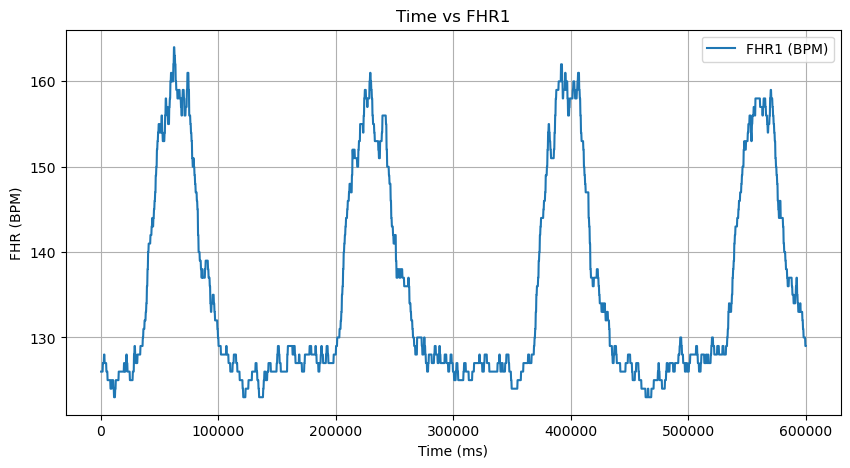

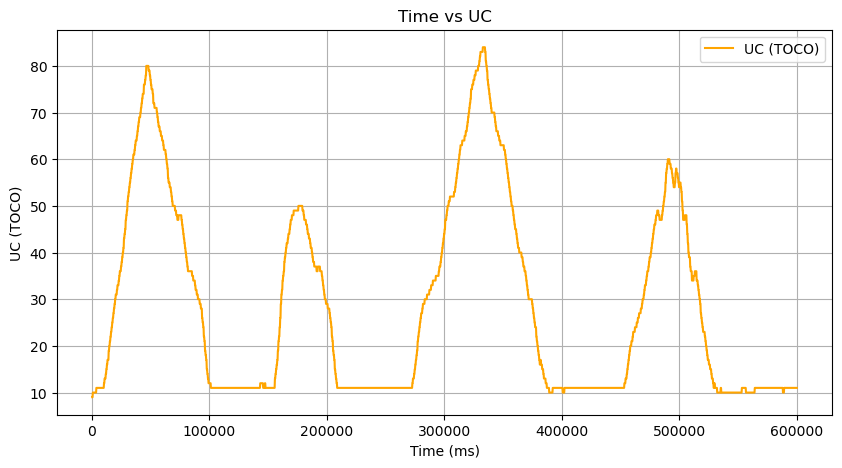

FHR Analysis Over Epochs:
     Epoch  Average FHR1 (BPM)  Average Pulse Interval (ms)
0        1          126.733333                   473.435034
1        2          125.666667                   477.453581
2        3          124.466667                   482.056776
3        4          124.466667                   482.056776
4        5          126.000000                   476.190476
..     ...                 ...                          ...
155    156          138.466667                   433.317285
156    157          136.600000                   439.238653
157    158          135.000000                   444.444444
158    159          133.533333                   449.326011
159    160          130.866667                   458.481915

[160 rows x 3 columns]

Number of peaks wider than 30 seconds: 4
Average duration of wide UC peaks: 45.34 seconds


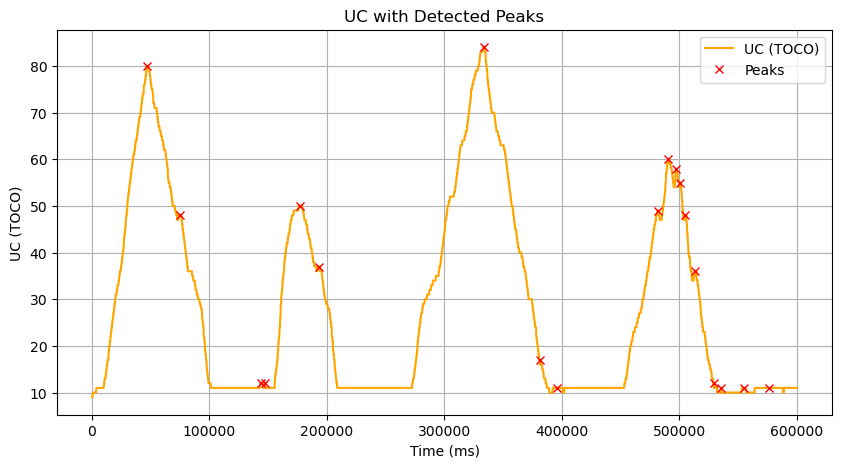

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

# Step 1: Load the dataset
data = pd.read_csv('Simulator_readings.csv')

# Step 2: Plot Time vs FHR1 and Time vs UC (TOCO)

# Plot Time vs FHR1
plt.figure(figsize=(10, 5))
plt.plot(data['Time(ms)'], data['Fhr1(BPM)'], label='FHR1 (BPM)')
plt.xlabel('Time (ms)')
plt.ylabel('FHR (BPM)')
plt.title('Time vs FHR1')
plt.legend()
plt.grid(True)
plt.show()

# Plot Time vs UC (TOCO)
plt.figure(figsize=(10, 5))
plt.plot(data['Time(ms)'], data['Uc(TOCO)'], color='orange', label='UC (TOCO)')
plt.xlabel('Time (ms)')
plt.ylabel('UC (TOCO)')
plt.title('Time vs UC')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: FHR Analysis (Epoch division and calculation)

# Each epoch is 3.75 seconds = 3750 ms, data is recorded at 250 ms intervals
epoch_duration_ms = 3750  # 3.75 seconds in milliseconds
epoch_size = int(epoch_duration_ms / 250)  # Number of data points per epoch

# Group data into epochs
epochs = data.groupby(np.arange(len(data)) // epoch_size)

# Calculate average FHR in BPM for each epoch
fhr1_avg_bpm = epochs['Fhr1(BPM)'].mean()

# Convert FHR to Pulse Intervals (milliseconds)
pulse_intervals = 60000 / fhr1_avg_bpm

# Display results
fhr_analysis = pd.DataFrame({
    'Epoch': range(1, len(fhr1_avg_bpm) + 1),
    'Average FHR1 (BPM)': fhr1_avg_bpm,
    'Average Pulse Interval (ms)': pulse_intervals
})

print("FHR Analysis Over Epochs:")
print(fhr_analysis)

# Step 4: UC Peak Detection

# Perform peak detection on UC data
uc_data = data['Uc(TOCO)']
peaks, _ = find_peaks(uc_data, height=8)  # Adjust height as needed to detect significant peaks

# Calculate peak widths at half of their maximum height
widths = peak_widths(uc_data, peaks, rel_height=0.5)[0]

# Convert width from number of data points to time in seconds
widths_in_seconds = widths * 250 / 1000  # Each data point is 250ms

# Count peaks with width > 30 seconds
wide_peaks = widths_in_seconds > 30
num_wide_peaks = sum(wide_peaks)
average_peak_width = np.mean(widths_in_seconds[wide_peaks]) if num_wide_peaks > 0 else 0

# Output peak results
print(f"\nNumber of peaks wider than 30 seconds: {num_wide_peaks}")
print(f"Average duration of wide UC peaks: {average_peak_width:.2f} seconds")

# Optional: Plot UC with detected peaks
plt.figure(figsize=(10, 5))
plt.plot(data['Time(ms)'], uc_data, label='UC (TOCO)', color='orange')
plt.plot(data['Time(ms)'][peaks], uc_data[peaks], 'rx', label='Peaks')
plt.xlabel('Time (ms)')
plt.ylabel('UC (TOCO)')
plt.title('UC with Detected Peaks')
plt.legend()
plt.grid(True)
plt.show()


# problem statement 2

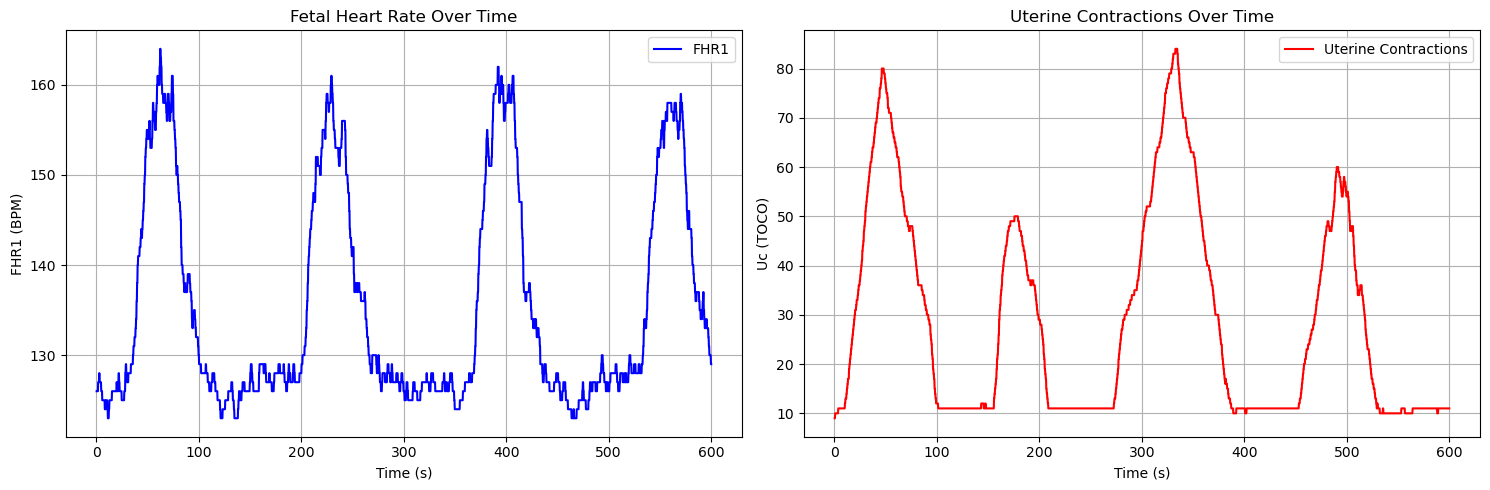

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Simulator_readings.csv')

# Convert milliseconds to seconds
data['Time(s)'] = data['Time(ms)'] / 1000

# Plot the data
plt.figure(figsize=(15, 5))

# Fetal Heart Rate 1
plt.subplot(1, 2, 1)
plt.plot(data['Time(s)'], data['Fhr1(BPM)'], label='FHR1', color='blue')
plt.title('Fetal Heart Rate Over Time')
plt.xlabel('Time (s)')
plt.ylabel('FHR1 (BPM)')
plt.grid()
plt.legend()

# Uterine Contractions
plt.subplot(1, 2, 2)
plt.plot(data['Time(s)'], data['Uc(TOCO)'], label='Uterine Contractions', color='red')
plt.title('Uterine Contractions Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Uc (TOCO)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.4905 - loss: 0.6793
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.5134 - loss: 0.6266
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.7561 - loss: 0.5500
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.7875 - loss: 0.5001
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8764 - loss: 0.3949
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.8555 - loss: 0.3416
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.8698 - loss: 0.3014
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.8758 - loss: 0.2852
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9018 - loss: 0.2305
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.9141 - loss: 0.2053
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


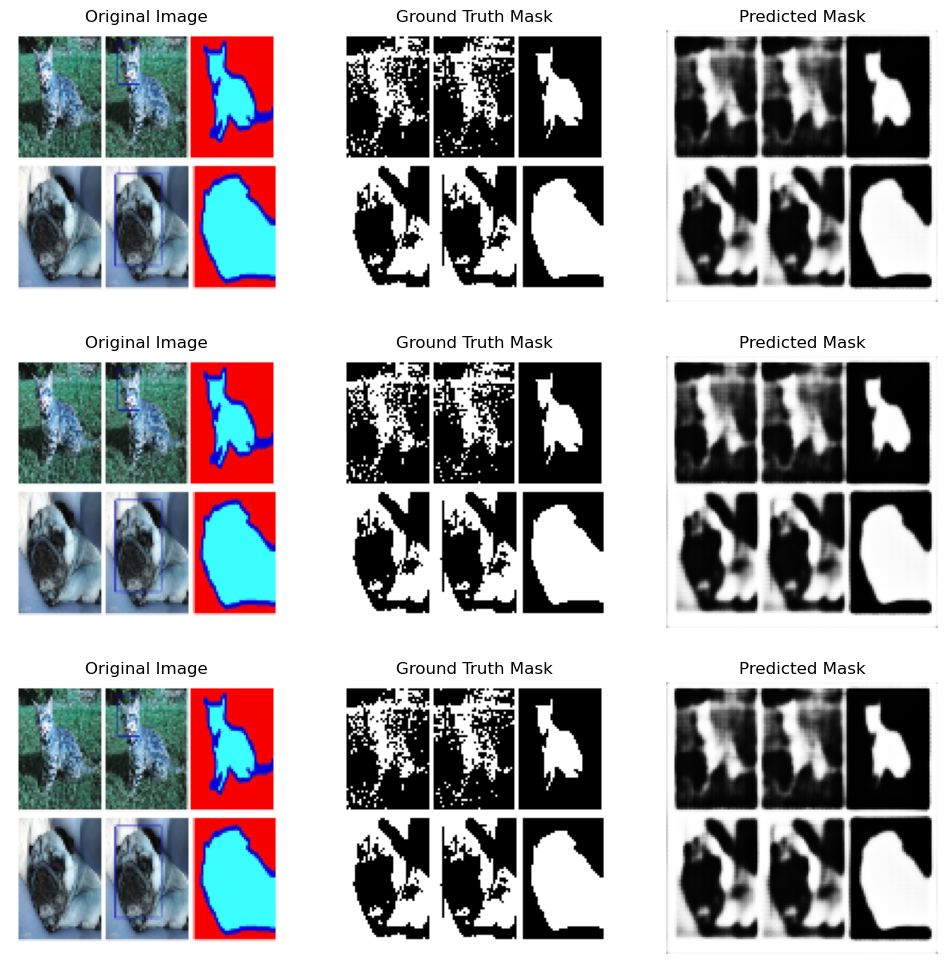

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load images from uploaded files
image_filenames = ['pet_annotations.jpg', 'pet_annotations (1).jpg', 'pet_annotations (2).jpg']

# Load and preprocess images
def load_images(image_filenames):
    images = []
    masks = []  # Placeholder for masks (need to create them for training)
    target_size = (128, 128)  # Define a target size for uniformity
    for filename in image_filenames:
        # Read image
        img = cv2.imread(filename)
        if img is not None:
            img_resized = cv2.resize(img, target_size)
            images.append(img_resized)
            
            # Create a dummy mask for demonstration (resize the mask as well)
            mask = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            _, mask_resized = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
            masks.append(mask_resized)

    return np.array(images), np.array(masks)

# Load the images and masks
images, masks = load_images(image_filenames)

# Normalize images and masks
images = images / 255.0  # Normalize images
masks = masks / 255.0    # Normalize masks
masks = np.expand_dims(masks, axis=-1)  # Add channel dimension

# Define U-Net model
def unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(256, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, 3, activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(512, 3, activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(512, 3, activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(256, 3, activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(256, 3, activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(128, 3, activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(128, 3, activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(64, 3, activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(64, 3, activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(32, 3, activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(32, 3, activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Build and compile U-Net model
model = unet_model(input_shape=(128, 128, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Using only a few images for demonstration; ideally, you should have more data
history = model.fit(images, masks, epochs=10, batch_size=1)

# Function to visualize results
def visualize_results(images, masks, preds):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(len(images), 3, i * 3 + 1)
        plt.imshow(images[i])
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(len(images), 3, i * 3 + 2)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        plt.subplot(len(images), 3, i * 3 + 3)
        plt.imshow(preds[i].squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

    plt.show()

# Make predictions on the training set (for demonstration)
predictions = model.predict(images)
visualize_results(images, masks, predictions)
